### Data Pre Processing

In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df_matches = pd.read_csv("matches.csv")
df_matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [56]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [57]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In [58]:
#plotting every team wins in ipl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
df_winner_matches = df_matches[['id','winner']].groupby('winner').size().reset_index()
df_winner_matches.columns = ['winner','total_wins']
df_winner_matches = df_winner_matches.sort_values('total_wins',ascending=False)

data = go.Bar(x = df_winner_matches['winner'],y = df_winner_matches['total_wins'])
layout = go.Layout(title = 'Total wins by every team in IPL',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

In [59]:
print(df_matches.columns)
print(df_deliveries.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [60]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [61]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [62]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

In [63]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [64]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head()

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel
462,463,2014,NaN,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,0,Delhi Capitals,0,4,JP Duminy
466,467,2014,NaN,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,0,Chennai Super Kings,7,0,RA Jadeja
468,469,2014,NaN,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,4,0,AJ Finch


In [65]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [66]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder are having null values. But if you consider today questions only player_dismissed is useful for calculating average of batsman. So i am removing remaining two features.

Filling player_dismissed null values with 'no wicket'

In [67]:
#dropping columns
df_deliveries = df_deliveries.drop(['dismissal_kind','fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket


### Exploratory Data Analysis(EDA)

### Q1) Who will win RCB or KXIP

In [68]:
#plotting RCB and KXIP wins against all teams
import plotly.graph_objs as go
df_winner = df_matches[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)
df_winner = df_winner[(df_winner['winner'] == 'Royal Challengers Bangalore') | (df_winner['winner'] == 'Kings XI Punjab')]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Total wins by RCB and KXIP in IPL',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

In [69]:
# Lets check winning ratio between RCB VS KXIP
df_RCB_KXIP = df_matches[((df_matches['team1'] == 'Royal Challengers Bangalore') | (df_matches['team1'] == 'Kings XI Punjab')) & 
                        ((df_matches['team2'] == 'Royal Challengers Bangalore') | (df_matches['team2'] == 'Kings XI Punjab'))] 

#plotting RCB and KXIP wins against each other
import plotly.graph_objs as go
df_winner = df_RCB_KXIP[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by RCB and KXIP against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show() 

By looking at above two observations RCB won 2 more matches than Punjab in IPL. But Wiining ratio against each other is almost similar  i.e 12:12.

In [70]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


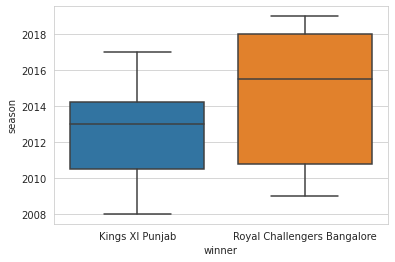

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
#boxplot
sns.set_style("whitegrid") 
sns.boxplot(x = 'winner', y = 'season', data = df_RCB_KXIP)

By looking at above boxplot RCB performed well in last few seasons compare to KXIP. We don't have any outliers present in data but we cant predict winner by using season feature. Lets look at other possibilities as well.

In [72]:
#Lets look at how many player of the match awards won by current RCB and KXIP players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_RCB = df_matches[(df_matches['player_of_match'] == 'V Kohli') | (df_matches['player_of_match'] == 'A Finch') |
                                (df_matches['player_of_match'] == 'AB de Villiers') | (df_matches['player_of_match'] == 'S Dube') |
                                (df_matches['player_of_match'] == 'YS Chahal') | (df_matches['player_of_match'] == 'CH Morris') |
                                (df_matches['player_of_match'] == 'Washington Sundar') | (df_matches['player_of_match'] == 'N Saini')]

print("Total number of man of matches won by present Bangalore players is", df_man_of_match_RCB.shape[0])

df_man_of_match_KXIP = df_matches[(df_matches['player_of_match'] == 'KL Rahul') | (df_matches['player_of_match'] == 'MA Agarwal') |
                                (df_matches['player_of_match'] == 'GJ Maxwell') | (df_matches['player_of_match'] == 'KK Nair') |
                                (df_matches['player_of_match'] == 'Mohammed Shami') | (df_matches['player_of_match'] == 'Mandeep Singh') |
                                (df_matches['player_of_match'] == 'CJ Jordan') | (df_matches['player_of_match'] == 'M Ashwin') ]
                                
print("Total number of man of matches won by Punjab players is", df_man_of_match_KXIP.shape[0])

Total number of man of matches won by present Bangalore players is 36
Total number of man of matches won by Punjab players is 18


**Conclusion:-**

By looking at above observation we can easily say that RCB has more match winners than Punjab beacuse RCB players won more man of the match awards. 

Cricket is a team game, So if your team have more match winners then you have higher chances of winning. So i am predicting RCB will win this match.

### Q2) How many wickets will KXIP loose in the match.

In [73]:
# First lets look at number of wickets taken at sharjah per match.
#To do this we have to combine two datasets(matches and deliveries).
df_total_data = pd.merge(df_matches, df_deliveries, left_on='id',right_on='match_id', how='outer')

df_sharjah_wickets = df_total_data[(df_total_data['city'] == 'Sharjah') & (df_total_data['player_dismissed'] != 'No Wicket')]
print("number of wickets fallen at sharjah is", + df_sharjah_wickets.shape[0], "in", + df_sharjah_wickets['match_id'].nunique(), "matches")
print("average number of wickets fallen at sharjah in one innings is", + (df_sharjah_wickets.shape[0])/(df_sharjah_wickets['match_id'].nunique() *2), "wickets")

number of wickets fallen at sharjah is 63 in 6 matches
average number of wickets fallen at sharjah in one innings is 5.25 wickets


By looking at above observation per match atleast 10 wickets are fallen. But we are calculating only punjab wickets(i.e one innings), So we can say the per innings team lost atleast 5 wickets.

Wickets are not only dependent on pitch and it also dependent on bowlers. So lets look at how many wickets taken by RCB bowlers.

In [74]:
#filtering out top 2 RCB bowlers wickets.
df_RCBbowl = df_deliveries[(df_deliveries['bowler'] == 'YS Chahal') | (df_deliveries['bowler'] == 'CH Morris')]
                          
#Lets calculate number of times KXIP batsman got out against 2 main RCB bowlers in number of matches 
print("RCB bowlers took",len(df_RCBbowl[df_RCBbowl['player_dismissed'] != 'No Wicket']),"Wickets in",df_RCBbowl['match_id'].nunique(), "matches")                                   
                                  

RCB bowlers took 180 Wickets in 137 matches


RCB main 2 bowlers took almost 2 wickets per match. But here we consider only 2bowlers. There are atleast 5bowlers will bowl in match. If you consider all 5 bowlers then we can say that they will take atleast 5 wickets in match.

**Conclusion** :- 

In First observation team lost more than 5 wickets at sharjah and in 2nd observation also RCB bowlers took atleast 5 wickets per match.

So i am predicting KXIP will loose 6-8 wickets in today match.

### Q3) How many runs partnerships will Virat Kohli and Ab De villiers put up

stat : In the last match they crossed 3000 runs partnership, this is highest in IPL by any pair

In [75]:
# Filtering out kohli and Abd from batsman and non-striker columns.
df_Virat_Abd_partnership = df_deliveries[((df_deliveries['batsman'] == 'V Kohli') & (df_deliveries['non_striker'] == 'AB de Villiers'))
                                                                                |                                  
                                         ((df_deliveries['non_striker'] == 'V Kohli') & (df_deliveries['batsman'] == 'AB de Villiers'))]

#partnershp runs means all the runs will count(i.e extras,bye,leg bye, no ball, wide, penalty).
#i.e why i took 'total_runs' feature
partnershp_runs = df_Virat_Abd_partnership['total_runs'].sum()
no_of_matches = df_Virat_Abd_partnership['match_id'].nunique()
print("The partnership runs between Kohli and Abd is ", partnershp_runs,"in",no_of_matches,"matches" )

#Lets calculate average runs scored by abd and kohli
batting_avg = partnershp_runs/(len(df_Virat_Abd_partnership[df_Virat_Abd_partnership['player_dismissed'] != 'No Wicket']))
print("batting partnership average of Kohli and Abd is", batting_avg)

The partnership runs between Kohli and Abd is  2860 in 68 matches
batting partnership average of Kohli and Abd is 44.0


In [76]:
#Lets calculate the kohli and abd partnership against current KXIP bowlers

df_Virat_Abd_KXIP = df_Virat_Abd_partnership[(df_Virat_Abd_partnership['bowler'] == 'Mohammed Shami') | (df_deliveries['bowler'] == 'CJ Jordan')|
                                             (df_Virat_Abd_partnership['bowler'] == 'M Ashwin')]
                                                                                                                
batting_avg = df_Virat_Abd_KXIP['total_runs'].sum()/(len(df_Virat_Abd_KXIP[df_Virat_Abd_KXIP['player_dismissed'] != 'No Wicket']))  
print("Kohli and Abd batting average against current KXIP bowlers",batting_avg)                                     

Kohli and Abd batting average against current KXIP bowlers 81.0


**Conclusion :-**

By looking above 2 observations i am predicting that their partnership in today match is 40 or more runs.

### Q4) How many Sixes will hit in the match

Actually sixes will dependent on batsman and Pitch both. Ex- In chinnaswamy(bangalore) batsman can hit more sixes than any other ground in india because of short boundaries.

Today match is at sharjah, Lets looks at average sixes hitted in that ground.

In [77]:
df_sharjah = df_total_data[df_total_data['city'] == 'Sharjah']

sixes_at_sharjah = len(df_sharjah[df_sharjah['batsman_runs'] == 6])
no_of_matches = df_sharjah['match_id'].nunique()
print(sixes_at_sharjah,"Sixes are hitted at Sharjah in",no_of_matches,"matches")
print("Sixes hitted per match in sharjah is",int(sixes_at_sharjah/no_of_matches))

76 Sixes are hitted at Sharjah in 6 matches
Sixes hitted per match in sharjah is 12


**Conclusion :-**

As per my cricket knowledge Sharjah cricket ground boundaries are very small almost equal to chinnaswmay(bangalore). 

Above analysis also giving 12 sixes per match. So i am predicting they will hit 11 - 14 sixes in the match.

### Q5) How many no-balls bowled in the match

In [100]:
#For no ball question i am filtering out the bowlers in both the team and checking how many no balls they bowled.
#Here i am not picking Ravi bishnoi, Isru udana, Arshadeep singh. I dont think they played ipl before this season except 1 or 2 matches.
df_KXIP_RCB_bowlers = df_deliveries[((df_deliveries['bowler'] == 'YS Chahal') | (df_deliveries['bowler'] == 'CH Morris') |
                               (df_deliveries['bowler'] == 'Washington Sundar	') | (df_deliveries['bowler'] == 'N Saini') |
                               (df_deliveries['bowler'] == 'Mohammed Shami') | (df_deliveries['bowler'] == 'M Ashwin') |
                               (df_deliveries['bowler'] == 'CJ Jordan'))] 
                            
print("Number of no balls bowled by RCB and KXIP bowlers : ",df_KXIP_RCB_bowlers['noball_runs'].sum())
print("Number of balls bowled by RCB and KXIP bowlers : ", df_KXIP_RCB_bowlers.shape[0])

Number of no balls bowled by RCB and KXIP bowlers :  22
Number of balls bowled by RCB and KXIP bowlers :  5196


In [106]:
#Lets convert number of balls into overs
no_of_overs = df_KXIP_RCB_bowlers.shape[0]//6

#We know every match has total 40 overs(20 overs per side).
#Here i am calculating number of matches will took to complte above number of overs.
no_of_matches = no_of_overs/40

print(int(no_of_matches), "matches will take to complete", no_of_overs, "overs in T20")

21 matches will take to complete 866 overs in T20


**Conclusion :-**

By using above analysis we can clearly say that they bowled 22 No balls in 21 matches. This is almost equal to 1 no ball per match.

I am predicting in today match number of No balls will be in the range of 1-2.
